# Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings("ignore")
import copy

# Load CSV's

In [2]:
#load csv's into dataframes.
bitcoin = pd.read_csv('coin_Bitcoin.csv')
dogecoin = pd.read_csv('coin_Dogecoin.csv')
eos = pd.read_csv('coin_EOS.csv')
ethereum = pd.read_csv('coin_Ethereum.csv')
monero = pd.read_csv('coin_Monero.csv')
litecoin = pd.read_csv('coin_Litecoin.csv')

# Making dataframe with relevant data

In [3]:
#joining the tables together to make 1 dataframe
crypto = pd.DataFrame({'Date' : bitcoin['Date'],'BTC' : bitcoin['Close'], 'DOG' : dogecoin['Close'], 'LTC' : litecoin['Close'],
                     'ETH' : ethereum['Close'], 'MNX' : monero['Close']})

In [4]:
#show first rows of the dataframe
crypto.head()

,Date,BTC,DOG,LTC,ETH,MNX
0,2013-04-29 23:59:59,144.539993,0.000205,4.38390,0.753325,2.09558
1,2013-04-30 23:59:59,139.000000,0.000269,4.29649,0.701897,2.96302
2,2013-05-01 23:59:59,116.989998,0.000362,3.80101,0.708448,3.70245
3,2013-05-02 23:59:59,105.209999,0.001162,3.37198,1.067860,3.13856
4,2013-05-03 23:59:59,97.750000,0.000704,3.04491,1.217440,3.02186


In [5]:
#show the size of the dataframe
crypto.shape

(2862, 6)

# Cleaning Dataframe

In [6]:
#show the data types of each column
crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2862 entries, 0 to 2861
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2862 non-null   object 
 1   BTC     2862 non-null   float64
 2   DOG     2631 non-null   float64
 3   LTC     2862 non-null   float64
 4   ETH     2031 non-null   float64
 5   MNX     2473 non-null   float64
dtypes: float64(5), object(1)
memory usage: 134.3+ KB


In [7]:
#changing data type of Date column from object to datetime
crypto['Date'] = pd.to_datetime(crypto['Date'])

In [8]:
#checking if the change was succesful
crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2862 entries, 0 to 2861
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2862 non-null   datetime64[ns]
 1   BTC     2862 non-null   float64       
 2   DOG     2631 non-null   float64       
 3   LTC     2862 non-null   float64       
 4   ETH     2031 non-null   float64       
 5   MNX     2473 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 134.3 KB


In [9]:
# delete all rows before 2017 and after june 2018
sample = crypto[~(crypto['Date'] < '2017-01-01')]
sample2 = sample[~(sample['Date'] > '2018-07-01')]
crypto2 = sample2

In [10]:
crypto2.head()

,Date,BTC,DOG,LTC,ETH,MNX
1343,2017-01-01 23:59:59,998.325012,0.001707,4.51159,164.736323,317.102997
1344,2017-01-02 23:59:59,1021.750000,0.001712,4.64894,164.513350,323.684998
1345,2017-01-03 23:59:59,1043.839966,0.001716,4.62620,167.838521,321.355011
1346,2017-01-04 23:59:59,1154.729980,0.001732,4.83785,161.574178,332.166992
1347,2017-01-05 23:59:59,1013.380005,0.001816,4.29272,167.623441,316.627991


In [11]:
crypto2.shape

(546, 6)

In [12]:
#check for missing values
crypto2.isna().sum()

Date    0
BTC     0
DOG     0
LTC     0
ETH     0
MNX     0
dtype: int64

In [13]:
##INCASE OF MISSING VALUE
#replace null values with value of previous row(to maintain the accuracy of the daily price of each cryptocurrency)
crypto2.fillna(method='ffill', inplace=True)

In [14]:
#finding any duplicates
duplicateRowsDF = crypto2[crypto2.duplicated()]
print(duplicateRowsDF)
#no duplicates found

Empty DataFrame
Columns: [Date, BTC, DOG, LTC, ETH, MNX]
Index: []


In [15]:
crypto2.head()

,Date,BTC,DOG,LTC,ETH,MNX
1343,2017-01-01 23:59:59,998.325012,0.001707,4.51159,164.736323,317.102997
1344,2017-01-02 23:59:59,1021.750000,0.001712,4.64894,164.513350,323.684998
1345,2017-01-03 23:59:59,1043.839966,0.001716,4.62620,167.838521,321.355011
1346,2017-01-04 23:59:59,1154.729980,0.001732,4.83785,161.574178,332.166992
1347,2017-01-05 23:59:59,1013.380005,0.001816,4.29272,167.623441,316.627991


# Exploring the Data & Initial analysis

In [16]:
# gets statistic of the dataframe
crypto2.describe()

,BTC,DOG,LTC,ETH,MNX
count,546.000000,546.000000,546.000000,546.000000,546.000000
mean,5714.509040,0.003641,85.632152,224.404963,121.250920
std,4321.857093,0.002338,77.760927,75.069308,73.813764
min,777.757019,0.000755,3.714530,110.605876,38.851702
25%,1858.589966,0.002107,27.467676,172.192327,64.365923
50%,4572.034912,0.002884,55.631699,207.888033,103.638500
75%,8435.865234,0.004997,135.987507,251.838281,146.567001
max,19497.400391,0.017088,358.335999,477.051924,373.247009


In [17]:
#make a copy of the dataframe
crypto3 = crypto2.copy()

<AxesSubplot:xlabel='Date'>

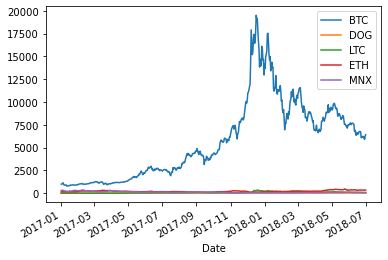

In [18]:
#plotting the value of the cryptocurrency over time
crypto2.set_index('Date').plot()
#btc values are too high to find a pattern in the plot

# Scaling the values to make it easier to find insights

In [20]:
crypto2.head()

,Date,BTC,DOG,LTC,ETH,MNX
1343,2017-01-01 23:59:59,998.325012,0.001707,4.51159,164.736323,317.102997
1344,2017-01-02 23:59:59,1021.750000,0.001712,4.64894,164.513350,323.684998
1345,2017-01-03 23:59:59,1043.839966,0.001716,4.62620,167.838521,321.355011
1346,2017-01-04 23:59:59,1154.729980,0.001732,4.83785,161.574178,332.166992
1347,2017-01-05 23:59:59,1013.380005,0.001816,4.29272,167.623441,316.627991


In [21]:
crypto3.head()

,Date,BTC,DOG,LTC,ETH,MNX
1343,2017-01-01 23:59:59,998.325012,0.001707,4.51159,164.736323,317.102997
1344,2017-01-02 23:59:59,1021.750000,0.001712,4.64894,164.513350,323.684998
1345,2017-01-03 23:59:59,1043.839966,0.001716,4.62620,167.838521,321.355011
1346,2017-01-04 23:59:59,1154.729980,0.001732,4.83785,161.574178,332.166992
1347,2017-01-05 23:59:59,1013.380005,0.001816,4.29272,167.623441,316.627991


In [22]:
#removing Date column from dataframe
crypto2.drop('Date', inplace=True, axis=1)

In [23]:
#removing Date column from dataframe
crypto3.drop('Date', inplace=True, axis=1)

In [24]:
crypto2.head()

,BTC,DOG,LTC,ETH,MNX
1343,998.325012,0.001707,4.51159,164.736323,317.102997
1344,1021.750000,0.001712,4.64894,164.513350,323.684998
1345,1043.839966,0.001716,4.62620,167.838521,321.355011
1346,1154.729980,0.001732,4.83785,161.574178,332.166992
1347,1013.380005,0.001816,4.29272,167.623441,316.627991


In [42]:
crypto3.head()

,BTC,DOG,LTC,ETH,MNX
1343,998.325012,0.001707,4.51159,164.736323,317.102997
1344,1021.750000,0.001712,4.64894,164.513350,323.684998
1345,1043.839966,0.001716,4.62620,167.838521,321.355011
1346,1154.729980,0.001732,4.83785,161.574178,332.166992
1347,1013.380005,0.001816,4.29272,167.623441,316.627991


In [25]:
# convert dataframe to array
crypto_array = crypto2.values

In [26]:
crypto_array

array([[9.98325012e+02, 1.70717004e-03, 4.51159000e+00, 1.64736323e+02,
        3.17102997e+02],
       [1.02175000e+03, 1.71183003e-03, 4.64894009e+00, 1.64513350e+02,
        3.23684998e+02],
       [1.04383997e+03, 1.71604997e-03, 4.62620020e+00, 1.67838521e+02,
        3.21355011e+02],
       ...,
       [5.90343994e+03, 1.89679284e-03, 7.49298019e+01, 3.40815845e+02,
        8.31812259e+01],
       [6.21829980e+03, 1.90752743e-03, 7.87688980e+01, 3.41808669e+02,
        8.08627023e+01],
       [6.40400000e+03, 1.92401270e-03, 8.13740005e+01, 3.50766159e+02,
        8.04883699e+01]])

In [27]:
#scaling the data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range = (0,100))
scaled = min_max_scaler.fit_transform(crypto_array)
scaled

array([[ 1.17827027,  5.82889864,  0.22476361, 14.77173724, 83.21028696],
       [ 1.30340614,  5.85743057,  0.26349507, 14.71088968, 85.17861624],
       [ 1.42141034,  5.88326819,  0.25708263, 15.61830042, 84.48184014],
       ...,
       [27.38130647,  6.98991117, 20.08205319, 62.82233648, 13.25662251],
       [29.06328223,  7.05563634, 21.16464306, 63.09326957, 12.56327439],
       [30.05528935,  7.15657151, 21.89925807, 65.53769226, 12.4513313 ]])

In [28]:
# convert scaled data to dataframe
crypto_scaled = pd.DataFrame(scaled, columns = ('BTC', 'DOG','LTC','ETH','MNX',))

In [29]:
crypto_scaled.head()

,BTC,DOG,LTC,ETH,MNX
0,1.178270,5.828899,0.224764,14.771737,83.210287
1,1.303406,5.857431,0.263495,14.710890,85.178616
2,1.421410,5.883268,0.257083,15.618300,84.481840
3,2.013783,5.979334,0.316766,13.908815,87.715133
4,1.258694,6.497502,0.163044,15.559607,83.068238


<AxesSubplot:>

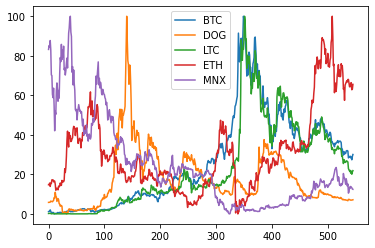

In [31]:
#visualize the scaled data
crypto_scaled.plot()

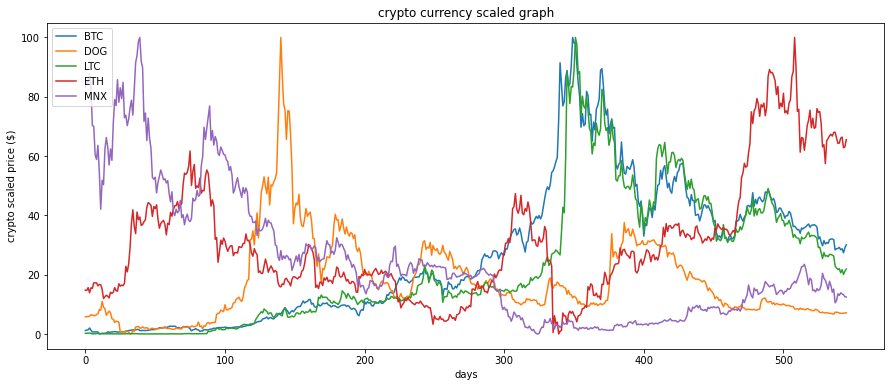

In [32]:
#maybe a bit bigger
crypto_graph = crypto_scaled

plt.figure(figsize=(15,6))
for c in crypto_graph.columns.values:
    plt.plot(crypto_graph[c], label = c)
    
plt.title('crypto currency scaled graph')
plt.xlabel('days')
plt.ylabel('crypto scaled price ($)')
plt.legend(crypto_graph.columns.values, loc = 'upper left')
plt.show()

In [44]:
crypto3.head()

,BTC,DOG,LTC,ETH,MNX
1343,998.325012,0.001707,4.51159,164.736323,317.102997
1344,1021.750000,0.001712,4.64894,164.513350,323.684998
1345,1043.839966,0.001716,4.62620,167.838521,321.355011
1346,1154.729980,0.001732,4.83785,161.574178,332.166992
1347,1013.380005,0.001816,4.29272,167.623441,316.627991


In [34]:
#get the daily simple return
DSR = crypto3.pct_change(1)
DSR.head()

,BTC,DOG,LTC,ETH,MNX
1343,NaN,NaN,NaN,NaN,NaN
1344,0.023464,0.002730,0.030444,-0.001354,0.020757
1345,0.021620,0.002465,-0.004891,0.020212,-0.007198
1346,0.106233,0.009143,0.045750,-0.037324,0.033645
1347,-0.122410,0.048870,-0.112680,0.037440,-0.046781


In [35]:
#reseting index
DSR = DSR.reset_index(drop=True)
DSR.head()

,BTC,DOG,LTC,ETH,MNX
0,NaN,NaN,NaN,NaN,NaN
1,0.023464,0.002730,0.030444,-0.001354,0.020757
2,0.021620,0.002465,-0.004891,0.020212,-0.007198
3,0.106233,0.009143,0.045750,-0.037324,0.033645
4,-0.122410,0.048870,-0.112680,0.037440,-0.046781


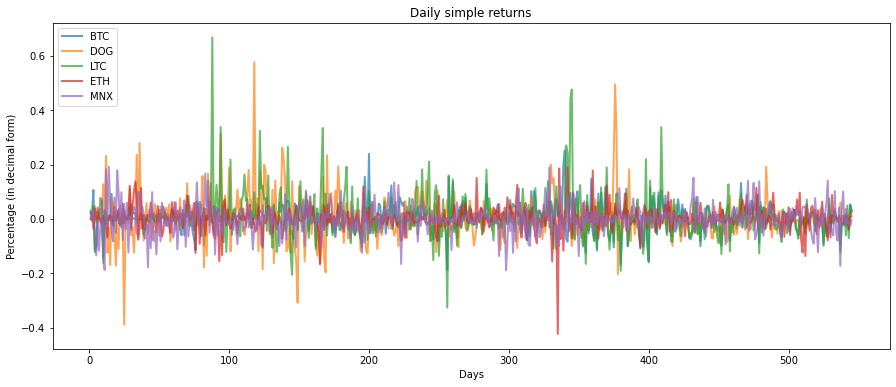

In [36]:
#visualize the daily simple returns
plt.figure(figsize=(15,6))
for c in DSR.columns.values:
    plt.plot(DSR.index, DSR[c], label = c, lw = 2, alpha = .7)
    
plt.title('Daily simple returns')
plt.xlabel('Days')
plt.ylabel('Percentage (in decimal form)')
plt.legend(DSR.columns.values, loc = 'upper left')
plt.show()

In [37]:
#get the volatility(using standard deviation)
print('the cryptocurrency volatility')
DSR.std()
#the higher the volatility the more risky of an investment

the cryptocurrency volatility


BTC    0.050147
DOG    0.079781
LTC    0.080717
ETH    0.046762
MNX    0.055225
dtype: float64

In [38]:
#show the mean of average daily return(average daily profit)
DSR.mean()


BTC    0.004664
DOG    0.003264
LTC    0.008292
ETH    0.002545
MNX   -0.000982
dtype: float64

In [39]:
#get correlation
DSR.corr()

,BTC,DOG,LTC,ETH,MNX
BTC,1.000000,0.019302,0.491070,-0.025558,-0.001073
DOG,0.019302,1.000000,0.048362,-0.005423,-0.014671
LTC,0.491070,0.048362,1.000000,0.016626,0.045559
ETH,-0.025558,-0.005423,0.016626,1.000000,0.023798
MNX,-0.001073,-0.014671,0.045559,0.023798,1.000000


In [40]:
# get the daily cumulative simple returns
DCSR = (DSR+1).cumprod()
DCSR

,BTC,DOG,LTC,ETH,MNX
0,NaN,NaN,NaN,NaN,NaN
1,1.023464,1.002730,1.030444,0.998646,1.020757
2,1.045591,1.005202,1.025404,1.018831,1.013409
3,1.156667,1.014392,1.072316,0.980805,1.047505
4,1.015080,1.063965,0.951487,1.017526,0.998502
...,...,...,...,...,...
541,6.103894,1.109458,17.037607,2.140263,0.269069
542,6.167460,1.109113,17.878331,2.148626,0.264764
543,5.913345,1.111074,16.608292,2.068857,0.262316
544,6.228733,1.117362,17.459232,2.074883,0.255005


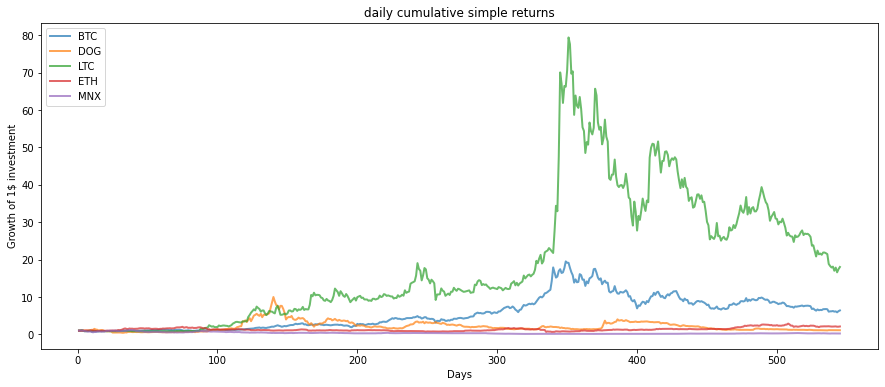

In [41]:
#plot daily cumulative simple returns(Growth of 1$ investment)
plt.figure(figsize=(15,6))
for c in DCSR.columns.values:
    plt.plot(DCSR.index, DCSR[c], label = c, lw = 2, alpha = .7)
    
plt.title('daily cumulative simple returns')
plt.xlabel('Days')
plt.ylabel('Growth of 1$ investment')
plt.legend(DCSR.columns.values, loc = 'upper left')
plt.show()
